# Domestic Flights on December 2008 Data Exploration
## by Thais Ruiz

## Preliminary Wrangling

This document explores a dataset of 544,958 domestic flights operations on December 2008.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
from plotly.offline import init_notebook_mode, iplot
from collections import Counter

%matplotlib inline

init_notebook_mode(connected=True) # send Plotly output to notebook

In [2]:
# load in the datasets into pandas dataframes
file_dir = 'C:/Users/DuranRuiz/Desktop/NanoDegree Data Analyst/Communicate Data Findings Project/Datasource'
os.chdir(file_dir)

flights_2008 = pd.read_csv('2008.csv')
airports = pd.read_csv('L_AIRPORT.csv')

In [3]:
# high-level overview of data shape and composition
print(flights_2008.shape)
print(flights_2008.dtypes)
print(flights_2008.head())

(7009728, 29)
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object
   Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  2008      1           3          4   2003.0        1955  

In [4]:
print(airports.shape)
print(airports.dtypes)
print(airports.sample(10))

(6510, 2)
Code           object
Description    object
dtype: object
     Code                                        Description
4610  RBG                    Roseburg, OR: Roseburg Regional
6380  YWJ                     Deline, Canada: Deline Airport
2569  JFN             Jefferson, OH: Northeast Ohio Regional
2887  KSM                 St. Mary's, AK: St. Mary's Airport
3656  MVW       Burlington/Mount Vernon, WA: Skagit Regional
3974  OBE                  Okeechobee, FL: Okeechobee County
2950  KZI                           Kozani, Greece: Filippos
4525  PZO  Puerto Ordaz, Venezuela: General Manuel Carlos...
2691  KAB             Kariba, Zimbabwe: Kariba International
5292  TAV                               Tau, TT: Tau Airport


In [5]:
# Subset of domestic flights operations on Dec-2008
flights_0812 = flights_2008[(flights_2008.Month==12)]

# Remove columns: Year, Month, TaxiIn, TaxiOut, TailNum, ActualElapsedTime, CRSElapsedTime, AirTime, Distance 
flights_0812 = flights_0812[['DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime',\
                             'UniqueCarrier', 'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Cancelled',\
                             'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay',\
                             'SecurityDelay', 'LateAircraftDelay']]

In [6]:
# Merge origin/destination description fields from airport dataframe to flights_0812 dataframe
flights_0812 = pd.merge(flights_0812, airports, left_on='Origin', right_on='Code').drop('Code', axis=1)
flights_0812.rename(columns = {'Description':'OriginDescription'}, inplace = True)

flights_0812 =  pd.merge(flights_0812, airports, left_on='Dest', right_on='Code').drop('Code', axis=1)
flights_0812.rename(columns = {'Description':'DestDescription'}, inplace = True)

In [7]:
# Check merged columns
print(flights_0812.columns)
flights_0812.sample(5)[['Origin', 'Dest', 'OriginDescription', 'DestDescription']]

Index(['DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'ArrDelay', 'DepDelay',
       'Origin', 'Dest', 'Cancelled', 'CancellationCode', 'Diverted',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'OriginDescription', 'DestDescription'],
      dtype='object')


,Origin,Dest,OriginDescription,DestDescription
186384,MKE,ORD,"Milwaukee, WI: General Mitchell International","Chicago, IL: Chicago O'Hare International"
183239,IAH,ORD,"Houston, TX: George Bush Intercontinental/Houston","Chicago, IL: Chicago O'Hare International"
323323,RDU,JFK,"Raleigh/Durham, NC: Raleigh-Durham International","New York, NY: John F. Kennedy International"
211053,ATL,IAD,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...","Washington, DC: Washington Dulles International"
144402,FLL,BWI,"Fort Lauderdale, FL: Fort Lauderdale-Hollywood...","Baltimore, MD: Baltimore/Washington Internatio..."


In [8]:
flights_0812.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544958 entries, 0 to 544957
Data columns (total 22 columns):
DayofMonth           544958 non-null int64
DayOfWeek            544958 non-null int64
DepTime              527926 non-null float64
CRSDepTime           544958 non-null int64
ArrTime              526376 non-null float64
CRSArrTime           544958 non-null int64
UniqueCarrier        544958 non-null object
FlightNum            544958 non-null int64
ArrDelay             524747 non-null float64
DepDelay             527926 non-null float64
Origin               544958 non-null object
Dest                 544958 non-null object
Cancelled            544958 non-null int64
CancellationCode     17779 non-null object
Diverted             544958 non-null int64
CarrierDelay         168647 non-null float64
WeatherDelay         168647 non-null float64
NASDelay             168647 non-null float64
SecurityDelay        168647 non-null float64
LateAircraftDelay    168647 non-null float64
OriginDe

In [9]:
# Change columns to category type
categories_cols = ['DayOfWeek', 'UniqueCarrier', 'Origin', 'Dest']

for col in categories_cols:
    flights_0812[col] = flights_0812[col].astype('category')

In [10]:
flights_0812.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544958 entries, 0 to 544957
Data columns (total 22 columns):
DayofMonth           544958 non-null int64
DayOfWeek            544958 non-null category
DepTime              527926 non-null float64
CRSDepTime           544958 non-null int64
ArrTime              526376 non-null float64
CRSArrTime           544958 non-null int64
UniqueCarrier        544958 non-null category
FlightNum            544958 non-null int64
ArrDelay             524747 non-null float64
DepDelay             527926 non-null float64
Origin               544958 non-null category
Dest                 544958 non-null category
Cancelled            544958 non-null int64
CancellationCode     17779 non-null object
Diverted             544958 non-null int64
CarrierDelay         168647 non-null float64
WeatherDelay         168647 non-null float64
NASDelay             168647 non-null float64
SecurityDelay        168647 non-null float64
LateAircraftDelay    168647 non-null float64

In [11]:
flights_0812.sample(10)

,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,OriginDescription,DestDescription
364095,18,4,2001.0,1920,2246.0,2204,NW,496,42.0,41.0,...,0,NaN,0,37.0,0.0,1.0,0.0,4.0,"Minneapolis, MN: Minneapolis-St Paul Internati...","Indianapolis, IN: Indianapolis International"
321500,3,3,739.0,745,1549.0,1600,AA,118,-11.0,-6.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,"Los Angeles, CA: Los Angeles International","New York, NY: John F. Kennedy International"
517828,12,5,1850.0,1845,1949.0,1943,XE,2731,6.0,5.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,"Houston, TX: George Bush Intercontinental/Houston","Shreveport, LA: Shreveport Regional"
99687,14,7,1845.0,1720,2157.0,1942,NW,125,135.0,85.0,...,0,NaN,0,85.0,0.0,50.0,0.0,0.0,"Minneapolis, MN: Minneapolis-St Paul Internati...","Phoenix, AZ: Phoenix Sky Harbor International"
324863,5,5,1110.0,1045,1224.0,1158,OH,6672,26.0,25.0,...,0,NaN,0,0.0,25.0,1.0,0.0,0.0,"Washington, DC: Ronald Reagan Washington National","New York, NY: John F. Kennedy International"
493874,5,5,2045.0,2045,2155.0,2157,OH,6427,-2.0,0.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,"Cincinnati, OH: Cincinnati/Northern Kentucky I...","Sioux Falls, SD: Joe Foss Field"
350959,18,4,637.0,620,835.0,818,US,1592,17.0,17.0,...,0,NaN,0,17.0,0.0,0.0,0.0,0.0,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...","Philadelphia, PA: Philadelphia International"
230839,23,2,1325.0,1328,1649.0,1648,FL,843,1.0,-3.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,"Minneapolis, MN: Minneapolis-St Paul Internati...","Atlanta, GA: Hartsfield-Jackson Atlanta Intern..."
357267,23,2,1106.0,1012,1444.0,1346,OO,6656,58.0,54.0,...,0,NaN,0,0.0,0.0,4.0,0.0,54.0,"Denver, CO: Denver International","Nashville, TN: Nashville International"
431372,25,4,920.0,925,1038.0,1040,AA,1903,-2.0,-5.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...","Ontario, CA: Ontario International"


In [20]:
# Descriptive statistics for numeric variables
print(flights_0812[['ArrDelay', 'DepDelay', 'Cancelled', 'Diverted'] + delay_cols].describe())

            ArrDelay       DepDelay      Cancelled       Diverted  \
count  524747.000000  527926.000000  544958.000000  544958.000000   
mean       16.680505      17.304380       0.032625       0.004463   
std        48.570617      44.880798       0.177652       0.066654   
min       -90.000000     -49.000000       0.000000       0.000000   
25%        -8.000000      -3.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%        23.000000      18.000000       0.000000       0.000000   
max      1655.000000    1597.000000       1.000000       1.000000   

        CarrierDelay   WeatherDelay       NASDelay  SecurityDelay  \
count  168647.000000  168647.000000  168647.000000  168647.000000   
mean       15.422806       4.435057      17.251395       0.072228   
std        39.539046      25.519685      31.153545       1.565449   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.0000

#### Data Subsets: On Time, Delayed, Cancelled and Diverted flights

In [12]:
on_time   = flights_0812.ArrDelay<15
delayed   = flights_0812.ArrDelay>=15 # A flight is considered delayed if its delay is over 15 minutes (inclusive)
cancelled = flights_0812.Cancelled==1
diverted  = flights_0812.Diverted==1

ontime_arr_flights = flights_0812[on_time]
delay_arr_flights  = flights_0812[delayed]
cancelled_flights  = flights_0812[cancelled]
diverted_flights   = flights_0812[diverted]

In [13]:
# On Time flights data info and its unique values in Cancelled/Diverted columns
ontime_arr_flights.info(), ontime_arr_flights.Cancelled.unique(), ontime_arr_flights.Diverted.unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356100 entries, 1 to 544957
Data columns (total 22 columns):
DayofMonth           356100 non-null int64
DayOfWeek            356100 non-null category
DepTime              356100 non-null float64
CRSDepTime           356100 non-null int64
ArrTime              356100 non-null float64
CRSArrTime           356100 non-null int64
UniqueCarrier        356100 non-null category
FlightNum            356100 non-null int64
ArrDelay             356100 non-null float64
DepDelay             356100 non-null float64
Origin               356100 non-null category
Dest                 356100 non-null category
Cancelled            356100 non-null int64
CancellationCode     0 non-null object
Diverted             356100 non-null int64
CarrierDelay         0 non-null float64
WeatherDelay         0 non-null float64
NASDelay             0 non-null float64
SecurityDelay        0 non-null float64
LateAircraftDelay    0 non-null float64
OriginDescription    356100 

(None, array([0], dtype=int64), array([0], dtype=int64))

In [14]:
# Delayed flights data info and its unique values in Cancelled/Diverted columns
delay_arr_flights.info(), delay_arr_flights.Cancelled.unique(), delay_arr_flights.Diverted.unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168647 entries, 0 to 544956
Data columns (total 22 columns):
DayofMonth           168647 non-null int64
DayOfWeek            168647 non-null category
DepTime              168647 non-null float64
CRSDepTime           168647 non-null int64
ArrTime              168647 non-null float64
CRSArrTime           168647 non-null int64
UniqueCarrier        168647 non-null category
FlightNum            168647 non-null int64
ArrDelay             168647 non-null float64
DepDelay             168647 non-null float64
Origin               168647 non-null category
Dest                 168647 non-null category
Cancelled            168647 non-null int64
CancellationCode     0 non-null object
Diverted             168647 non-null int64
CarrierDelay         168647 non-null float64
WeatherDelay         168647 non-null float64
NASDelay             168647 non-null float64
SecurityDelay        168647 non-null float64
LateAircraftDelay    168647 non-null float64
Ori

(None, array([0], dtype=int64), array([0], dtype=int64))

In [15]:
cancelled_flights.info(), cancelled_flights.Diverted.unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17779 entries, 528 to 544954
Data columns (total 22 columns):
DayofMonth           17779 non-null int64
DayOfWeek            17779 non-null category
DepTime              747 non-null float64
CRSDepTime           17779 non-null int64
ArrTime              0 non-null float64
CRSArrTime           17779 non-null int64
UniqueCarrier        17779 non-null category
FlightNum            17779 non-null int64
ArrDelay             0 non-null float64
DepDelay             747 non-null float64
Origin               17779 non-null category
Dest                 17779 non-null category
Cancelled            17779 non-null int64
CancellationCode     17779 non-null object
Diverted             17779 non-null int64
CarrierDelay         0 non-null float64
WeatherDelay         0 non-null float64
NASDelay             0 non-null float64
SecurityDelay        0 non-null float64
LateAircraftDelay    0 non-null float64
OriginDescription    17779 non-null object
DestDe

In [43]:
diverted_flights.info(), diverted_flights.Cancelled.unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2432 entries, 997 to 544953
Data columns (total 13 columns):
DayofMonth           2432 non-null int64
DayOfWeek            2432 non-null category
DepTime              2432 non-null float64
CRSDepTime           2432 non-null int64
ArrTime              1629 non-null float64
CRSArrTime           2432 non-null int64
UniqueCarrier        2432 non-null category
FlightNum            2432 non-null int64
DepDelay             2432 non-null float64
Origin               2432 non-null category
Dest                 2432 non-null category
OriginDescription    2432 non-null object
DestDescription      2432 non-null object
dtypes: category(4), float64(3), int64(4), object(2)
memory usage: 309.8+ KB


In [45]:
# Compare sum of the causes of the delay columns with arrival delay

delay_cols = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

(delay_arr_flights[delay_cols].sum(axis=1) == delay_arr_flights['ArrDelay']).sum()

168647

The sum of the delay causes in minutes totals the arrival delay  in the  delayed flights subset

### Subsets cleaning

On time, delayed, cancelled and diverted statuses are exclusive among them. For ex. cancelled flights cannot be diverted or viceversa.
#### On Time flights dataset
- Cancellation code and delay causes columns are extraneous and null. They should be removed.
- Cancelled and Diverted values are 0 (since subsets are exclusive). These statuses columns could be removed.

#### Delayed flights dataset
- Cancellation code column is extraneous and null. It should be removed.
- Cancelled and Diverted values are 0 (since subsets are exclusive). These statuses columns could be removed.

#### Cancelled flights dataset
- Arrival time, arrival delay and delay causes are extraneous and null. They should be removed.
- Cancelled value is 1 and Diverted value is 0 (since subsets are exclusive). These statuses columns could be removed.
- Departure time and delay have (17032) missing values. *BUT HOW CANCELLED FLIGHTS HAVE DEPARTURE DATA???* XXX Assign -1 (negative value) to the rest? XXXXXX

#### Diverted flights dataset
- Cancellation data and delay causes are extraneous and null. They should be removed.
- Cancelled value is 0 and Diverted value is 1 (since subsets are exclusive). These statuses columns could be removed.
- Arrival time has (803) missing values. XXX *ARRIVAL TIME SHOULD BE NULL FOR DIVERTED FLIGHTS???*

In [21]:
# Drop null columns
ontime_arr_flights = ontime_arr_flights.drop(['Cancelled', 'CancellationCode', 'Diverted'] + delay_cols, axis=1)
ontime_arr_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356100 entries, 1 to 544957
Data columns (total 14 columns):
DayofMonth           356100 non-null int64
DayOfWeek            356100 non-null category
DepTime              356100 non-null float64
CRSDepTime           356100 non-null int64
ArrTime              356100 non-null float64
CRSArrTime           356100 non-null int64
UniqueCarrier        356100 non-null category
FlightNum            356100 non-null int64
ArrDelay             356100 non-null float64
DepDelay             356100 non-null float64
Origin               356100 non-null category
Dest                 356100 non-null category
OriginDescription    356100 non-null object
DestDescription      356100 non-null object
dtypes: category(4), float64(4), int64(4), object(2)
memory usage: 31.9+ MB


In [22]:
# Drop null columns
delay_arr_flights  = delay_arr_flights.drop(['Cancelled', 'CancellationCode', 'Diverted'], axis=1)
delay_arr_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168647 entries, 0 to 544956
Data columns (total 19 columns):
DayofMonth           168647 non-null int64
DayOfWeek            168647 non-null category
DepTime              168647 non-null float64
CRSDepTime           168647 non-null int64
ArrTime              168647 non-null float64
CRSArrTime           168647 non-null int64
UniqueCarrier        168647 non-null category
FlightNum            168647 non-null int64
ArrDelay             168647 non-null float64
DepDelay             168647 non-null float64
Origin               168647 non-null category
Dest                 168647 non-null category
CarrierDelay         168647 non-null float64
WeatherDelay         168647 non-null float64
NASDelay             168647 non-null float64
SecurityDelay        168647 non-null float64
LateAircraftDelay    168647 non-null float64
OriginDescription    168647 non-null object
DestDescription      168647 non-null object
dtypes: category(4), float64(9), int64(4

In [23]:
# Drop null columns
cancelled_flights  = cancelled_flights.drop(['Cancelled', 'Diverted', 'ArrTime', 'ArrDelay'] + delay_cols, axis=1)
cancelled_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17779 entries, 528 to 544954
Data columns (total 22 columns):
DayofMonth           17779 non-null int64
DayOfWeek            17779 non-null category
DepTime              747 non-null float64
CRSDepTime           17779 non-null int64
ArrTime              0 non-null float64
CRSArrTime           17779 non-null int64
UniqueCarrier        17779 non-null category
FlightNum            17779 non-null int64
ArrDelay             0 non-null float64
DepDelay             747 non-null float64
Origin               17779 non-null category
Dest                 17779 non-null category
Cancelled            17779 non-null int64
CancellationCode     17779 non-null object
Diverted             17779 non-null int64
CarrierDelay         0 non-null float64
WeatherDelay         0 non-null float64
NASDelay             0 non-null float64
SecurityDelay        0 non-null float64
LateAircraftDelay    0 non-null float64
OriginDescription    17779 non-null object
DestDe

In [24]:
# Drop null columns
diverted_flights   = diverted_flights.drop(['Cancelled', 'CancellationCode', 'Diverted', 'ArrDelay']\
                                           + delay_cols, axis=1)
diverted_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2432 entries, 997 to 544953
Data columns (total 13 columns):
DayofMonth           2432 non-null int64
DayOfWeek            2432 non-null category
DepTime              2432 non-null float64
CRSDepTime           2432 non-null int64
ArrTime              1629 non-null float64
CRSArrTime           2432 non-null int64
UniqueCarrier        2432 non-null category
FlightNum            2432 non-null int64
DepDelay             2432 non-null float64
Origin               2432 non-null category
Dest                 2432 non-null category
OriginDescription    2432 non-null object
DestDescription      2432 non-null object
dtypes: category(4), float64(3), int64(4), object(2)
memory usage: 229.8+ KB


### What is the structure of your dataset?

There are 544,958 entries in the dataset with information of flights operations on December 2008. It features airlines, origin/destination, scheduled and actual arrival/departure times, delays time/causes and cancellation/divert status. Airlines, airports and cities/states are categorical variables; departure/arrivals times, delays and status are numeric, being the delays calculated differences between the actual and scheduled times of departures and arrivals.

The dataset can be split in four exclusive subsets per their statuses: on time (on time arrivals), delayed (late arrivals with delays over 15 mins), cancelled and diverted.

In the delayed flights subset the sum of the delay causes in minutes totals the arrival delay.

### What is/are the main feature(s) of interest in your dataset?

I am most interested in figuring out which airlines and cities had more flight delays and what are the causes.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect main US cities close the holidays time have more and longest delays; also expect flights to/from these destinations/origins be cancelled per winter weather conditions.

## Univariate Exploration


#### Departure/Arrival Delays on December 2008

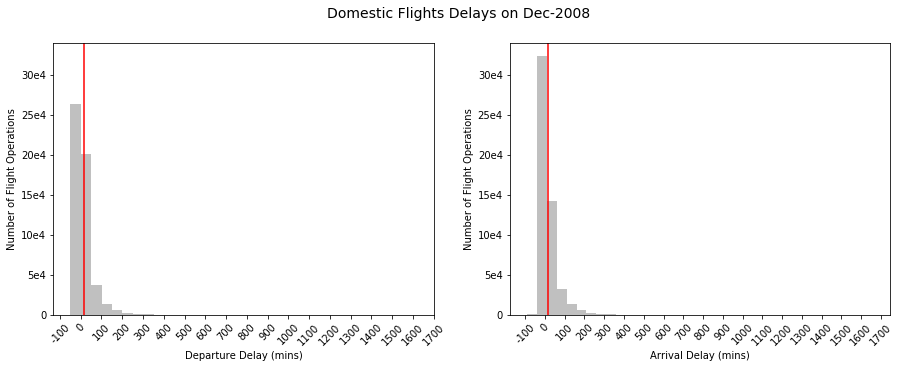

In [26]:
# Histogram plotting

fig = plt.figure(figsize = [15, 5])
fig.suptitle('Domestic Flights Delays on Dec-2008', fontsize=14)

# Departure and Arrival delays subset without Nan values
dep_delay = flights_0812[np.isfinite(flights_0812['DepDelay'])].DepDelay
arr_delay = flights_0812[np.isfinite(flights_0812['ArrDelay'])].ArrDelay

dep_bins = np.arange(dep_delay.min(), dep_delay.max()+50, 50) 
arr_bins = np.arange(arr_delay.min(), arr_delay.max()+50, 50) 

xticks = [i*100 for i in np.arange(-1, 18)]
yticks = [i*5e4 for i in np.arange(0, 7)]
ylabels = ['0','5e4', '10e4', '15e4', '20e4', '25e4', '30e4']

ax1 = plt.subplot(1,2,1)
plt.hist(dep_delay, bins=dep_bins, color='silver')
plt.xlabel('Departure Delay (mins)')
plt.ylabel('Number of Flight Operations')
plt.xticks(xticks, xticks, rotation=45)
plt.yticks(yticks, ylabels)
plt.axvline(x=15, c='red');

ax2 = plt.subplot(1,2,2, sharey=ax1)
plt.hist(arr_delay, bins=arr_bins, color='silver')
plt.xlabel('Arrival Delay (mins)')
plt.ylabel('Number of Flight Operations')
plt.xticks(xticks, xticks, rotation=45)
plt.axvline(x=15, c='red');

Both of the above distributions are right skewed, with long tail.

On each plot, the red line divides the on time flights to the left, and the delayed ones to the right.
A flight is considered delayed when it has a delay of 15 or more minutes than the schedule.

Delay plots show many on time flights on Dec-2008: more than 250,000 for departure and more than 300,000 for arrivals; but still it is visible a bulk of delayed flights too: around 200,000 for departure and close to 150,000 for arrivals.

But how many flights were on track that day (not cancelled or not diverted)? (see Pie Chart below)

Interesting that the frequency for ontime flights are different in both plots; with an approximate difference around 50,000 flights, which delays are in the negative range from -100 to 0 minutes.

It might be worthy to explore these skewed distributions on a log scale.

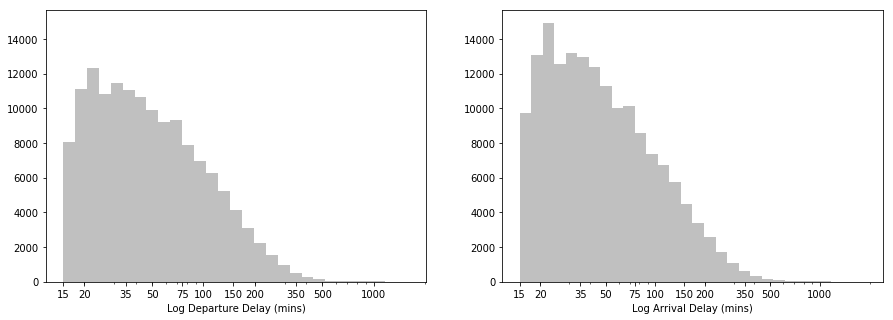

In [27]:
# Delayed departures and arrivals on a log scale

plt.figure(figsize = [15, 5]);

dep_bins = 10 ** np.arange(np.log10(15), np.log10(dep_delay.max())+0.07, 0.07)
arr_bins = 10 ** np.arange(np.log10(15), np.log10(arr_delay.max())+0.07, 0.07)

xticks = [15, 20, 35, 50, 75, 100, 150, 200, 350, 500, 1000]

ax1 = plt.subplot(1,2,1)
plt.hist(dep_delay, bins=dep_bins, color='silver')
plt.xscale('log')
plt.xlabel('Log Departure Delay (mins)')
plt.xticks(xticks, xticks);

ax2 = plt.subplot(1,2,2, sharey=ax1)
plt.hist(arr_delay, bins=arr_bins, color='silver')
plt.xscale('log')
plt.xlabel('Log Arrival Delay (mins)')
plt.xticks(xticks, xticks);

When plotted on a log-scale, the delay distributions have a sloping shape (similar to a Weibull distribution) as for departures and as for arrivals. Both plots are very similar, with peaks on same intervals, although with different frequencies. The most frequent delays are situated in the range of 20-25 minutes.
Outliers seem to be located on delays greater than 8 hours (>= 500 minutes) in both plots.

#### On Time, Delayed, Cancelled and Diverted Flights on December 2008

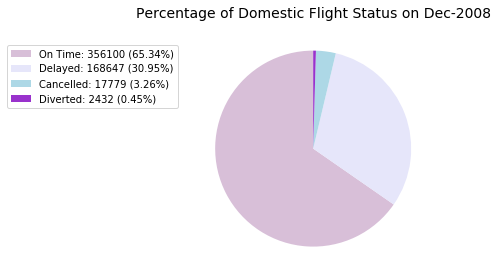

In [28]:
# Pie chart plotting

status = ['On Time', 'Delayed', 'Cancelled', 'Diverted']
sizes  = [len(ontime_arr_flights), len(delay_arr_flights), len(cancelled_flights), len(diverted_flights)]
total  = sum(sizes)
labels = ['{:.2f}%'.format(sizes[i]*100/total) for i in np.arange(0,4)]
colors = ['thistle','lavender', 'lightblue', 'darkorchid']

patches, texts, autotexts = plt.pie(sizes, autopct='', startangle=90, colors=colors)

plt.axis('square') # equal aspect ratio ensures that pie is drawn as a circle
plt.title('Percentage of Domestic Flight Status on Dec-2008\n', fontsize=14)

subtotal_list = ['{}: {} ({})'.format(status[i], sizes[i], labels[i]) for i in np.arange(0,4)]

plt.legend(patches, subtotal_list, bbox_to_anchor=(-0.1, 1.), fontsize=10);

Out of 544,958 scheduled flight operations on Dec-2008, 356,100 were on time (65.34%), 168,647 (30.95%) delayed, 17,779 (3.26%) were cancelled and 2,432 (.45%) were diverted.
Flights with arrival delays over 15 minutes are the ones considered as 'delayed'.

#### Flights Operations by Airlines on Dec-2008

In [29]:
# Dictionary of airlines codes and names
Airlines = {'9E':'Endeavor Air', 'AA':'American Airlines', 'AS':'Alaska Airlines', 'B6':'JetBlue Airways',\
            'CO':'Continental Air Lines', 'DL':'Delta Air Lines', 'EV':'ExpressJet Airlines', 'F9':'Frontier Airlines',\
            'FL':'AirTran Airways', 'HA': 'Hawaiian Airlines', 'MQ':'Envoy Air', 'NW':'Northwest Airlines',\
            'OH':'PSA Airlines', 'OO':'SkyWest Airlines', 'UA':'United Air Lines', 'US':'US Airways',\
            'WN': 'Southwest Airlines', 'XE':'ExpressJet Airlines(1)', 'YV':'Mesa Airlines'}

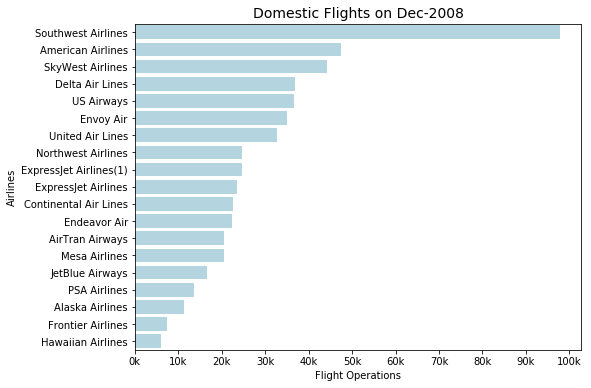

In [30]:
# Bar chart plotting

cat_order = flights_0812['UniqueCarrier'].value_counts().index

plt.figure(figsize=(8,6))
sb.countplot(data=flights_0812, y='UniqueCarrier', color='lightblue', order=cat_order)

plt.title( 'Domestic Flights on Dec-2008', fontsize=14)
plt.xlabel('Flight Operations')
plt.ylabel('Airlines');

xlocs   = [0, 10e3, 20e3, 30e3, 40e3, 50e3, 60e3, 70e3, 80e3, 90e3, 10e4]
xlabels = ['{}k'.format(i*10) for i in np.arange(0,11)]
plt.xticks(xlocs, xlabels)

ylocs, ylabels = plt.yticks()
ylabels = [Airlines[cat] for cat in cat_order]
plt.yticks(ylocs, ylabels);

The airline with more flight operations (almost 100,000) on Dec-2008 was Southwest, followed by American and Skywest (both airlines with operations above the mid 40,000).
On the bottom side, Frontier and Hawaiian Airlines, operated each one less than 10,000 flights that period.

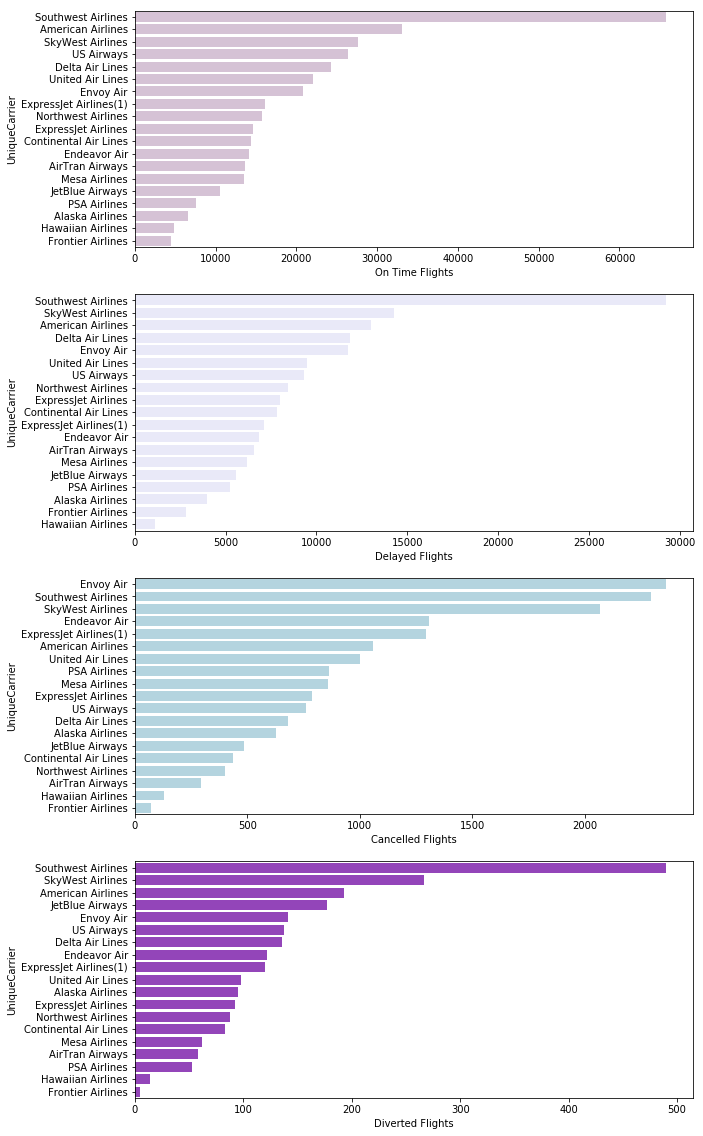

In [31]:
# Bar chart plotting of airlines by flight statuses
fig, ax = plt.subplots(nrows=4, figsize=[10,20]);

flight_status = [ontime_arr_flights, delay_arr_flights, cancelled_flights, diverted_flights]

orders = [ ontime_arr_flights['UniqueCarrier'].value_counts().index,\
           delay_arr_flights['UniqueCarrier'].value_counts().index,\
           cancelled_flights['UniqueCarrier'].value_counts().index,\
           diverted_flights['UniqueCarrier'].value_counts().index]

for i in np.arange(0,len(status)):
    sb.countplot(data=flight_status[i], y='UniqueCarrier', color=colors[i], order=orders[i], ax=ax[i])
    ax[i].set(xlabel=status[i]+' Flights', yticklabels=[Airlines[order] for order in orders[i]])

plt.show()

ESCRIBIR ANALISIS

For on time flights,


Envoy is situated among the top-5 delayed, the first on cancelled and in the top-5 diverted.

the bar chart got the same airlines order like in the bar chart for all domestic flights operations; and it makes sense since it represents 96.29% of the data.
Southwest remain in the top with more scheduled flight operations on Dec-2008, except for cancelled flights, were Envoy has the 1st position and Southwest the 2nd.
On the bottom end, Frontier and Hawaiian are located as the airlines with the least scheduled flight operations, regardless the status.

Relative frequencies of cancellations and diversions in relation to total of flights operations per airline, would give better sense of proportions of each airline on these statuses.

GROUP BY AIRLINE AND CALCULATE OF CANCELLATION AND DIVERSION PROPORTIONS
ALSO GROUP BY AIRLINE TO SEE THE PROPORTION OF DELAYS

BOTH ABOVE ALSO GROUPED BY STATES

#### Domestic Flights Operations per Days of Week

Since December has 31 days, 4 weeks + 3 days, the frequency of days of the week is 4 for four days and 5 for the other three days. To be fair on the Days of Week comparison, the frequency flights will be measured by the average of flights per day of the week.

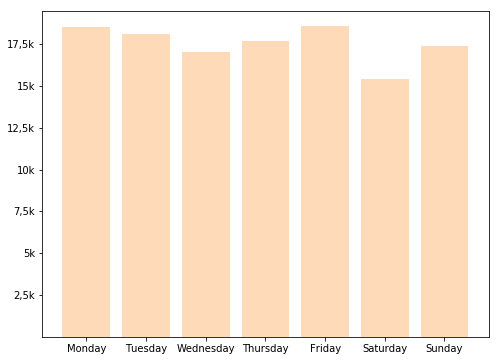

In [32]:
# Bar plotting
plt.figure(figsize=[8,6]);

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_frequency = [5,5,5,4,4,4,4]

groupby_day_wk = flights_0812.groupby('DayOfWeek').count()[['DayofMonth']]
day_avg = groupby_day_wk.DayofMonth / days_frequency # average of flights per day of the week

plt.bar(day_avg.index, day_avg, color='peachpuff')
plt.xticks(np.arange(1,8), days)
plt.yticks([2500,5000,7500,10000,12500,15000,17500],['2,5k','5k','7,5k','10k','12,5k','15k','17,5k']);

On Dec-2008, the most popular traveling day was Friday, followed by Monday (both days with an average around 18,500 daily flights). The less popular traveling day was Saturday (average around 15,500 daily flights).

#### Domestic Flights Timeline on Dec-2008

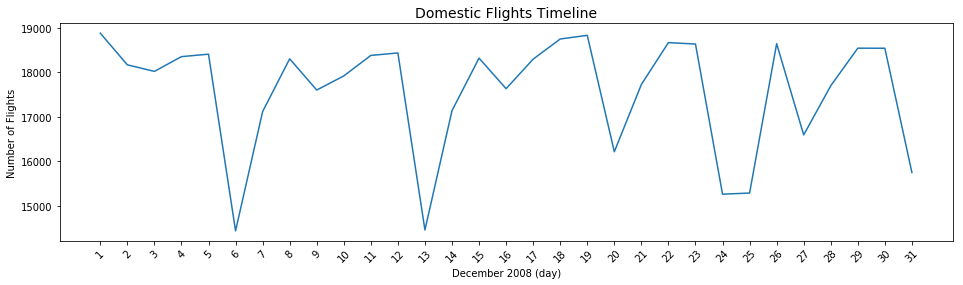

In [33]:
# Timeline plotting
plt.figure(figsize=[16,4])
groupby_day = flights_0812.groupby('DayofMonth').count()[['DayOfWeek']]

plt.errorbar(data=groupby_day, x=groupby_day.index, y=groupby_day);

plt.title( 'Domestic Flights Timeline', fontsize=14)
plt.xlabel('December 2008 (day)')
plt.ylabel('Number of Flights')

xticks = np.arange(1,32)
plt.xticks(xticks, xticks, rotation=45);

On every week the timeline looks similar ('bimodal' shape) until December 20th (a day before Hanukkah commences). From this date on, the frequency of flight operations is exceptional per the Winter Holidays: the frequency ascends through the 22nd-23rd, and then it plummets on Christmas eve and remains pretty much the same on Christmas day.
On the same Holidays, like Christmas and New Year's Eve (both on Wednesdays), flights operation drop drastically.

The 'bimodal' shape shows peaks on Fridays (days 5, 12, 19, 26) and lower spikes on Saturdays (days 6, 13, 20 and 27). A weaker plummeting in flights frequency occurs on Tuesdays (days 2,9,16).

About frequencies, the lowest points show around 14,500 flights (Dec 6, 13) and the top ones above 18,000 flights. The maximum frequency (close to 19,000) was on December 1st (first Monday after Thanksgiving 2008).

#### Flights Operations from/to State on Dec-2008

In [34]:
# Split the Origin fields (city:State and airport) and extract the State
origin_city_airport = flights_0812.OriginDescription.str.split(':')
states_list = [city[0][-2:] for city in origin_city_airport]

# Count the ocurrences of each State, convert from Counter object to Series and sort descending by values
origin_valct = pd.Series(Counter(states_list)).sort_values(ascending=False)
print(origin_valct)
len(origin_valct)

# https://stackoverflow.com/questions/2600191/how-can-i-count-the-occurrences-of-a-list-item

CA    62278
TX    58499
FL    38718
GA    35359
IL    34734
NY    25208
CO    22934
AZ    17858
NC    16893
OH    16094
MI    15400
NV    14877
DC    12784
TN    12725
PA    12687
UT    11156
NJ    10459
MN    10139
MO     9906
WA     9652
HI     9385
MA     9060
MD     8239
WI     5872
OR     5841
LA     5243
IN     4598
OK     3831
VA     3789
AL     3582
NM     3276
SC     3150
AK     2809
AR     2780
KY     2509
NE     2407
IA     2333
CT     2148
ID     2098
PR     1924
MS     1846
RI     1775
MT     1535
NH     1410
KS     1116
WY      799
SD      758
ND      666
ME      640
VT      531
WV      351
VI      297
dtype: int64


52

*Notice that there are 52 States, since PR (Puerto Rico) and VI (Virgin Islands) are included in the data.
For the State Heatmap, unfortunately there is no way under the parameter 'locationmode' to incorporate these origins in.
The same will apply for destinations*

In [35]:
# (Origin) State Heatmap plotting
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale=scl,
        autocolorscale=False,
        locations=origin_valct.index,
        z=origin_valct,
        locationmode='USA-states',
        marker = dict(line = dict(color='rgb(255,255,255)', width=2)),
        colorbar = dict(title="Flights Operations")
    ) ]

layout = dict(
        title = 'Domestic Flights FROM State on Dec-2008<br>',
        geo = dict(scope='north america', projection=dict( type='albers usa'))
        )

fig = dict( data=data, layout=layout )

iplot( fig, filename='origin-cloropleth-map' )

# Source: https://datascience.stackexchange.com/questions/9616/how-to-create-us-state-heatmap

Origin States with more flight operations (around 60k) on Dec-2008 were California (62,278) and Texas (58,499), followed by Florida (38,718), Georgia (35,359) and Illinois (34,734). On the bottom end below the 10k flights operations, are Wyoming (799), South Dakota (758),  North Dakota (666), Maine (640), Vermont (531) and West Virginia (351). The top ones are shaded darker and the bottom ones in lighter shades.

*These numbers are visible as hovering over the States in the map*

In [36]:
# Split the Destination fields (city:State and airport) and extract the State
destin_city_airport = flights_0812.DestDescription.str.split(':')
states_list = [city[0][-2:] for city in destin_city_airport]

# Count the ocurrences of each State, convert from Counter object to Series and sort by values
destin_valct = pd.Series(Counter(states_list)).sort_values(ascending=False)
destin_valct

CA    62280
TX    58495
FL    38729
GA    35404
IL    34732
NY    25202
CO    22936
AZ    17867
NC    16892
OH    16085
MI    15395
NV    14880
DC    12780
TN    12719
PA    12690
UT    11167
NJ    10453
MN    10143
MO     9913
WA     9652
HI     9384
MA     9057
MD     8238
WI     5878
OR     5838
LA     5234
IN     4587
OK     3823
VA     3786
AL     3581
NM     3277
SC     3144
AK     2813
AR     2778
KY     2506
NE     2406
IA     2331
CT     2145
ID     2094
PR     1930
MS     1842
RI     1775
MT     1536
NH     1409
KS     1115
WY      796
SD      759
ND      666
ME      639
VT      531
WV      349
VI      297
dtype: int64

In [37]:
# (Destination) State Heatmap plotting

data[0]['locations'] = destin_valct.index
data[0]['z'] = destin_valct
layout['title'] = 'Domestic Flights TO State on Dec-2008<br>'

fig = dict( data=data, layout=layout )

iplot( fig, filename='destin-cloropleth-map' )

Destination States with more flight operations (around 60k) on Dec-2008 were California (62,280) and Texas (58,495), followed by Florida (38,729), Georgia (35,404) and Illinois (34,732). On the bottom end below the 10k flights operations, are Wyoming (796), South Dakota (759),  North Dakota (666), Maine (639), Vermont (531) and West Virginia (349). The top ones are shaded darker and the bottom ones in lighter shades.

*These numbers are visible as hovering over the States in the map*

In [38]:
origin_valct - destin_valct

CA    -2
TX     4
FL   -11
GA   -45
IL     2
NY     6
CO    -2
AZ    -9
NC     1
OH     9
MI     5
NV    -3
DC     4
TN     6
PA    -3
UT   -11
NJ     6
MN    -4
MO    -7
WA     0
HI     1
MA     3
MD     1
WI    -6
OR     3
LA     9
IN    11
OK     8
VA     3
AL     1
NM    -1
SC     6
AK    -4
AR     2
KY     3
NE     1
IA     2
CT     3
ID     4
PR    -6
MS     4
RI     0
MT    -1
NH     1
KS     1
WY     3
SD    -1
ND     0
ME     1
VT     0
WV     2
VI     0
dtype: int64

The difference flights operations by State is very small, keeping the same frequency order as for Origin as for Destination; therefore the heat map for both looks the same, with the same shades on the States. It is likely that these variables are highly correlated with one another.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Logarithm transformation was needed for right skewed distributions of flights with delays greater than 15 minutes. For negative delays, it was not worthy since the logarithm function applies only for positive values.
By manipulating the bin sizes to get a better look of the distributions, the resultant shapes were similar to a Weibull distribution as well for departures and as for arrivals. 
Outliers seem to be located on delays longer than 8 hours.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

In the exploration of flights operations by airlines, the data was split in four exclusive subsets according the following statuses: on time (arrivals), delayed (late arrivals), cancelled and diverted.
The split was a consequence of finding many null values in the original dataset; and it helped to understand the dataset structure: for ex. delayed causes are not null for delayed arrivals, but for the rest of the data is null.

## Bivariate Exploration


The dataset offers few numeric variables: two related to delay in minutes (DepDelay and ArrDelay), two related to status (Cancelled and Diverted), and the other related to scheduled/actual departure/arrival times.
The ones related to delays and to status are exclusive among them: one cancelled flight is not diverted or viceversa; non-cancelled/non-diverted flights are on track with no-Nan data in their delays fields (which are calculated difference between actual and scheduled times for departures and arrivals).
Given this, the only exploration left for numerical variables are between Arrival and Departure delays.

The rest of the bivariate exploration will be between the subsets on-track, cancelled and diverted with the categorical variables.

### PAIR GRIDS FOR SUBSETS WITHOUT NAN VALUES

#### ON TIME

In [3]:
ot_num_vars = ['DayofMonth', 'DayOfWeek', 'ArrDelay', 'DepDelay']

g = sb.PairGrid(data=ontime_arr_flights, vars=ot_num_vars)
g = g.map_diag(plt.hist, bins = 100);
g.map_offdiag(plt.scatter)

NameError: name 'sb' is not defined

#### Flights per the Departure Time  (morning, afternoon, night)
#### Relative frequency of flights

#### Departure Delay vs Arrival Delay

In [ ]:
plt.scatter(data=flights_0812, x='DepDelay', y='ArrDelay', alpha=.1)
plt.xlabel('Departure Delay (mins)')
plt.ylabel('Arrival Delay (mins)')
plt.axvline(15, color='r')
plt.axhline(15, color='r');

The red lines divide the scatter plot in four sections, to remark flights considered on time or delayed.

It seems there is a very strong positive correlation between Departure and Arrival Delays:
Mostly for those flights that depart or arrive before the scheduled time, or are on time (located in the left bottom square).
The second main frequency is allocated for ontime departures with delayed arrivals (upper left square).
Then on the upper right section, delayed departures follow a linear relationship with delayed arrivals; and finally, a group of delayed departures end up on ontime arrivals (shown in the bottom right section on the plot).

#### Exploring Outliers: delays over 8 hours

In [ ]:
delay_arr_flights[delay_arr_flights.ArrDelay>=480][delay_cols].sum()

The main cause for delays over 8 hours is the Carrier Delay

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!